In [1]:
import geopandas as gpd
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os


Los archivos a analizar deben de ser almacenados en la carpeta datos, y debe de existir unicamente un archivo shp son sus respectivas correlaciones necesarias.

In [2]:
# Obtener la ruta de la carpeta "datos"
carpeta = os.path.join(os.getcwd(), 'Datos')

# Buscar el archivo .shp dentro de la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.shp'):
        # Leer el archivo con GeoPandas
        ruta_archivo = os.path.join(carpeta, archivo)
        red = gpd.read_file(ruta_archivo)
        break

red_df = pd.DataFrame(red)
red_df.to_csv('..\\Programa\\Datos\\nuevo.csv')
# Define una función para extraer las coordenadas de inicio y fin de cada línea
def get_start_end_coords(line):
    start = line.coords[0]
    end = line.coords[-1]
    return pd.Series({'start_lat': start[1], 'start_lon': start[0], 'end_lat': end[1], 'end_lon': end[0]})

# Aplica la función a cada fila del GeoDataFrame y crea cuatro nuevas columnas
red[['start_lat', 'start_lon', 'end_lat', 'end_lon']] = red.geometry.apply(get_start_end_coords)
# Convierte el objeto GeoDataFrame a un DataFrame de pandas
red_df = pd.DataFrame(red)

# Exporta el DataFrame a un archivo csv
red_df.to_csv('..\\Programa\\Datos\\nuevo.csv', index=False)


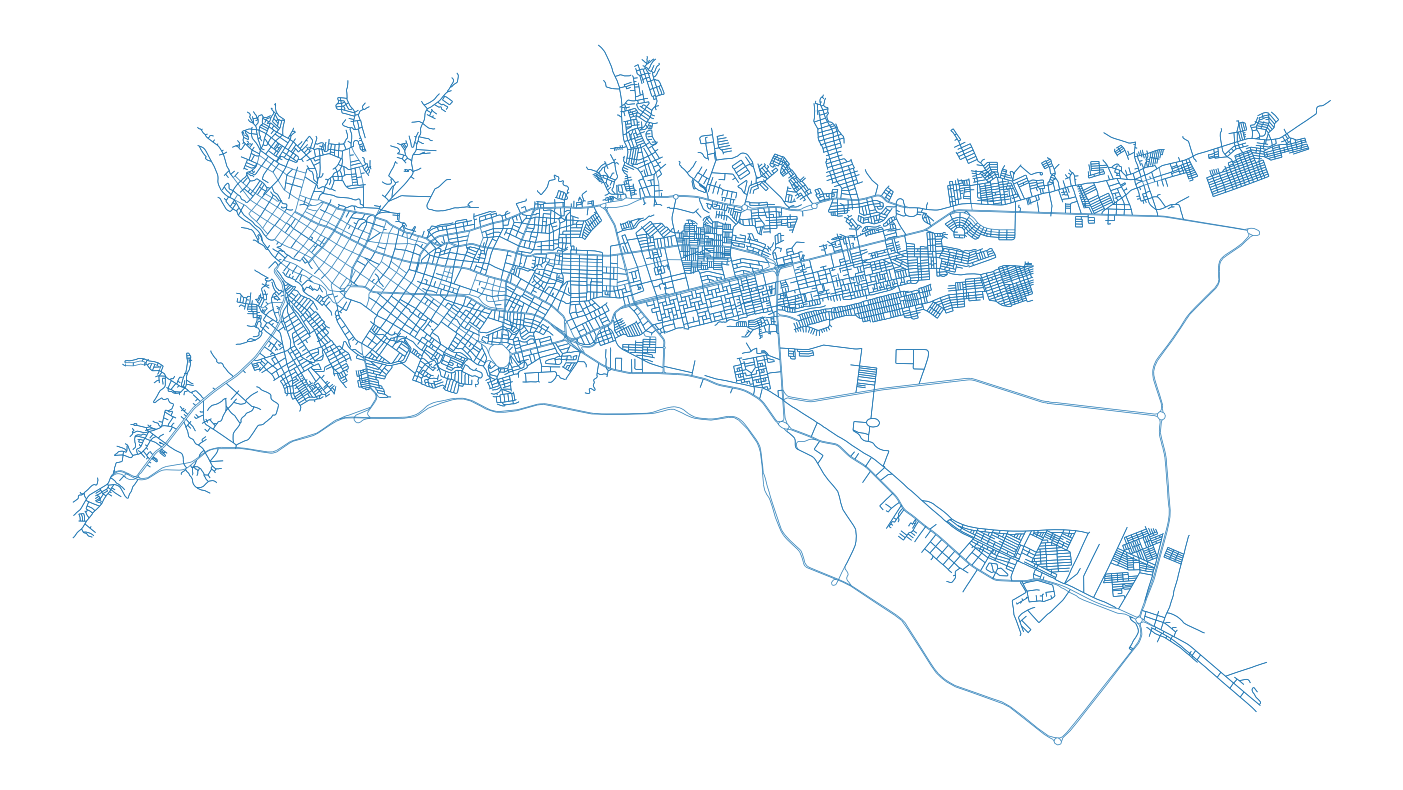

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))
red.plot(ax=ax, linewidth=0.5)
ax.set_axis_off()

In [4]:
archivo = pd.read_csv('..\\Programa\\Datos\\nuevo.csv')
archivo


,DIR,NOMENCLATU,CATEGORIA,NOMEN,JER_POT,JER_PMMEP,Long_KM,Shape_Leng,angulo1,angulo2,slope,FID,velocity_k,long_m,TV,geometry,start_lat,start_lon,end_lat,end_lon
0,1,CALLE 20,CALLE-PRIMER-ORDEN,Cl 20,Malla víal local,Malla víal local,0.068802,68.801895,36.123963,36.445994,1.828875,0,22.003983,68.801895,0.187608,LINESTRING (-75.23551099957909 4.4371009997764...,4.437101,-75.235511,4.437603,-75.235145
1,1,CALLE 19,CALLE-PRIMER-ORDEN,Cl 19,Malla víal arterial primaria,Malla víal arterial primaria,0.089808,89.808234,199.524533,216.501489,-4.077699,1,22.026378,89.808234,0.244638,LINESTRING (-75.23516099986428 4.4383420003005...,4.438342,-75.235161,4.437640,-75.235533
2,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial secundari,Colectoras,0.102935,102.934913,302.580455,303.041108,4.033832,2,14.825392,102.934913,0.416589,LINESTRING (-75.23489799990543 4.4397369998130...,4.439737,-75.234898,4.440240,-75.235678
3,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial secundari,0.117046,117.046090,114.747128,114.807639,-5.290759,3,26.063237,117.046090,0.269451,LINESTRING (-75.23583699976534 4.4419580000737...,4.441958,-75.235837,4.441516,-75.234879
4,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial primaria,0.114319,114.318731,117.520102,118.003455,-2.102832,4,35.087447,114.318731,0.195487,LINESTRING (-75.236137000241 4.443464999805958...,4.443465,-75.236137,4.442985,-75.235225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27932,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,312.258774,312.258774,-1.806031,27932,17.543749,19.999996,0.068400,LINESTRING (-75.25594915567848 4.4197993935415...,4.419799,-75.255949,4.419921,-75.256083
27933,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,132.258774,132.258774,1.806031,27933,13.659199,19.999996,0.087853,LINESTRING (-75.25608268464403 4.4199207822956...,4.419921,-75.256083,4.419799,-75.255949
27934,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,186.866659,186.866659,2.216708,27934,13.217541,19.719950,0.089517,LINESTRING (-75.17573942169315 4.4259646688973...,4.425965,-75.175739,4.425788,-75.175760
27935,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,6.866659,6.866659,-2.216708,27935,17.985408,19.719950,0.065786,LINESTRING (-75.1757603993574 4.42578761871231...,4.425788,-75.175760,4.425965,-75.175739


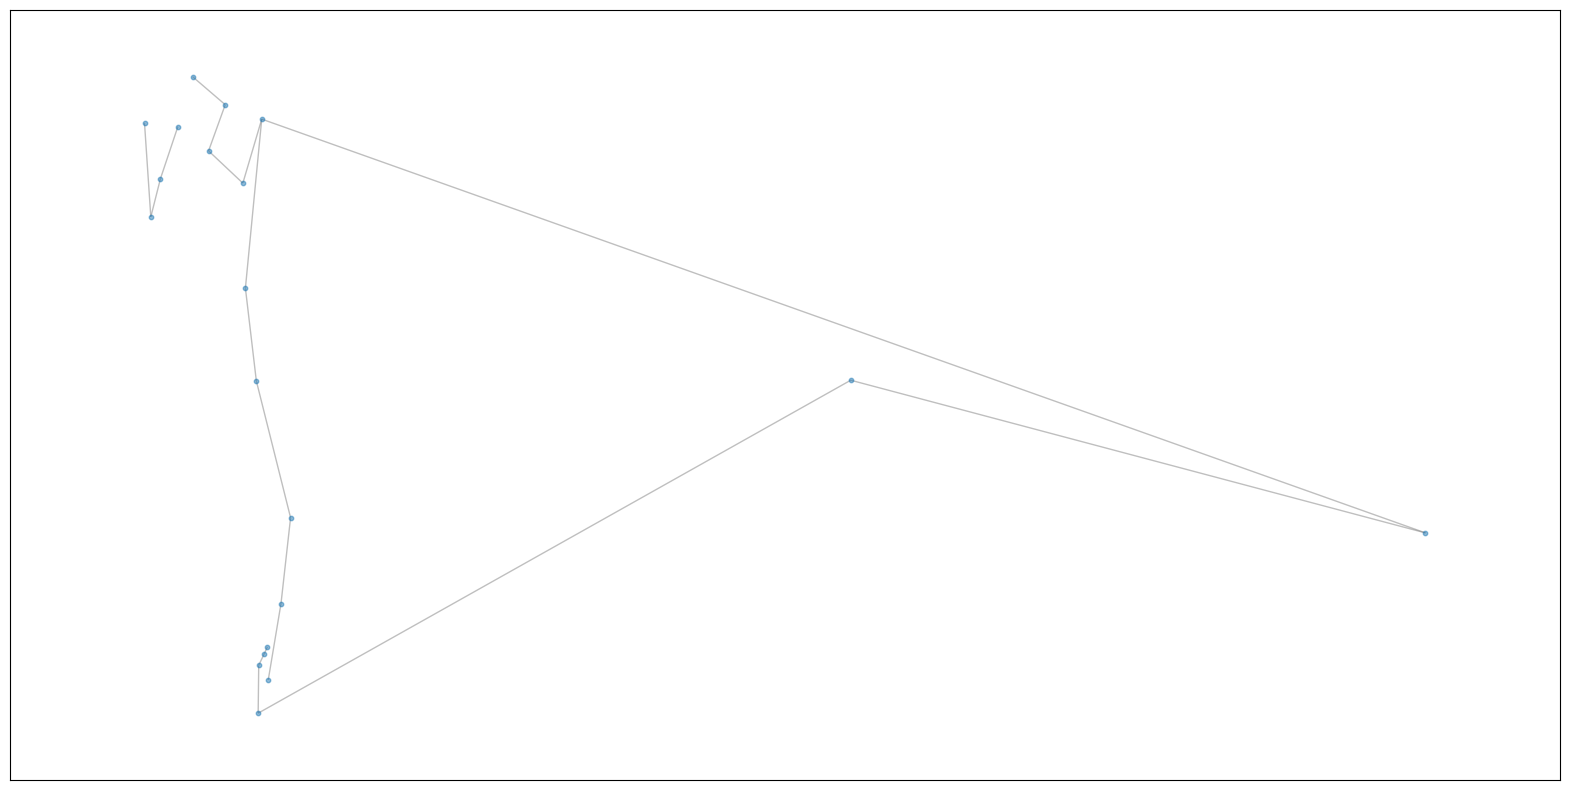

In [5]:
# Crear un grafo vacío con NetworkX
G = nx.Graph()

# Obtener la ruta del archivo CSV
ruta_archivo = os.path.join(os.getcwd(), 'Datos', 'nuevo.csv')

# Leer solo las primeras x filas del archivo CSV
archivo = pd.read_csv(ruta_archivo, nrows=20)

# Diccionario para almacenar los nodos existentes con sus coordenadas
nodos_existentes = {}

# Agregar nodos y arcos al grafo
for i, row in archivo.iterrows():
    # Agregar nodo de inicio si no existe en el grafo
    start_lat, start_lon = row['start_lat'], row['start_lon']
    start_node = None
    for node_id, data in G.nodes(data=True):
        if data['lat'] == start_lat and data['lon'] == start_lon:
            start_node = node_id
            break
    if start_node is None:
        start_node = i
        G.add_node(start_node, lat=start_lat, lon=start_lon)
    
    # Agregar nodo de fin si no existe en el grafo
    end_lat, end_lon = row['end_lat'], row['end_lon']
    end_node = None
    for node_id, data in G.nodes(data=True):
        if data['lat'] == end_lat and data['lon'] == end_lon:
            end_node = node_id
            break
    if end_node is None:
        end_node = i+1
        G.add_node(end_node, lat=end_lat, lon=end_lon)
    
    # Agregar la arista al grafo
    G.add_edge(start_node, end_node, weight=row['TV'])

# Obtener las posiciones de los nodos en un diccionario
pos = {}
for node_id, data in G.nodes(data=True):
    lat = data['lat']
    lon = data['lon']
    pos[node_id] = (lon, lat)

# Dibujar el grafo con las posiciones geográficas de los nodos
fig, ax = plt.subplots(figsize=(20,10))
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=10, alpha=0.5, ax=ax, edge_color='gray')

plt.show()


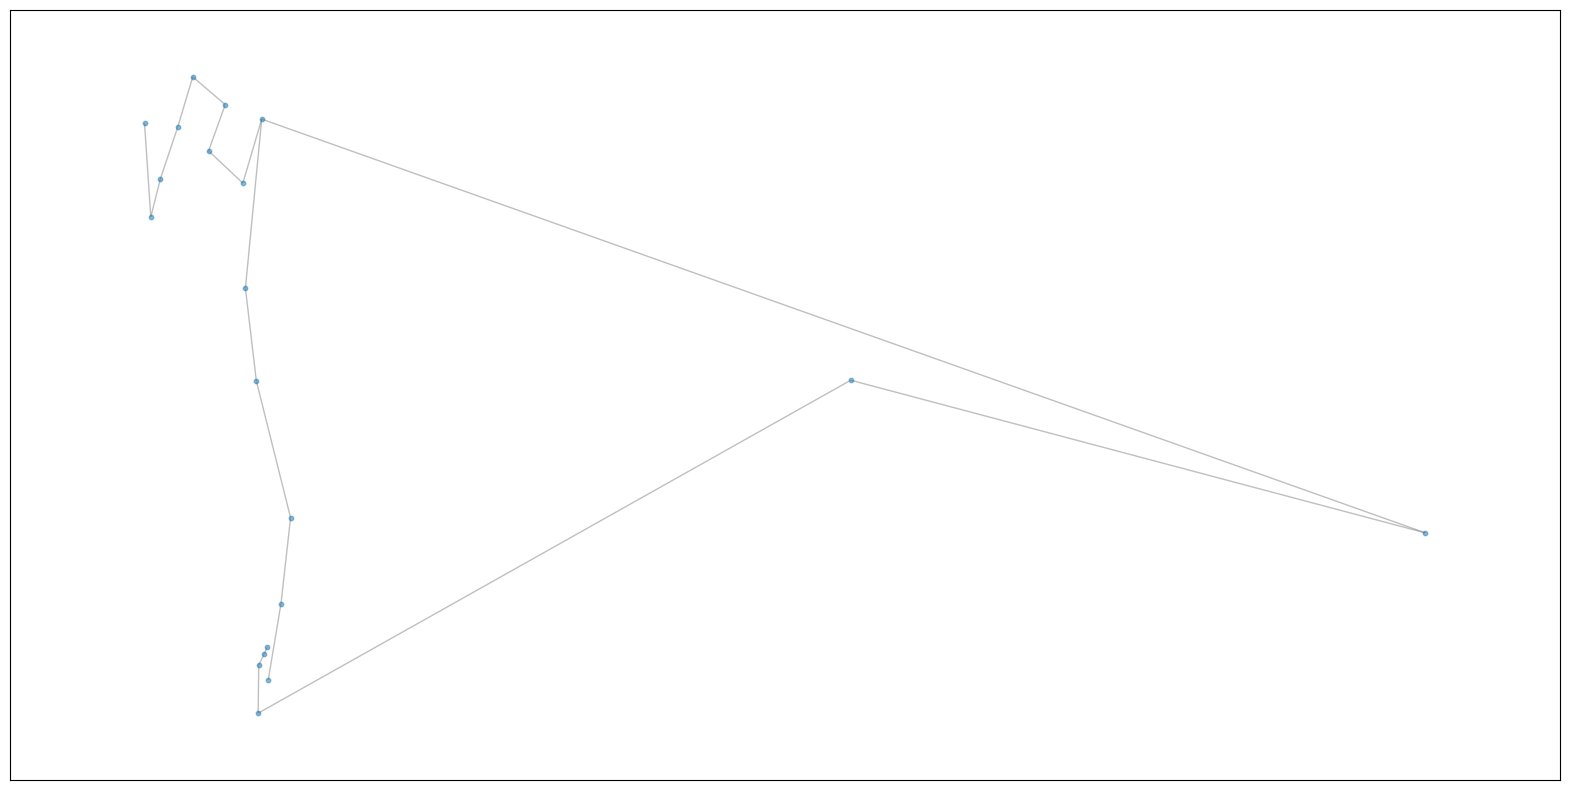

In [6]:
# Obtener las componentes conectadas del grafo
componentes_conectadas = list(nx.connected_components(G))
velocidad = 10 #m/s velocidad promedio ciclistas
# Recorrer cada componente desconectada
for i, component in enumerate(componentes_conectadas):
    # Encontrar el centroide de la componente desconectada
    centroid = np.mean([pos[node_id] for node_id in component], axis=0)
    
    # Encontrar la componente conectada más cercana
    distancia_minima = float('inf')
    componente_mas_cercana = None
    for j, otra_componente in enumerate(componentes_conectadas):
        if i == j:
            continue
        otro_centroide = np.mean([pos[node_id] for node_id in otra_componente], axis=0)
        distancia = np.linalg.norm(centroid - otro_centroide)
        if distancia < distancia_minima:
            distancia_minima = distancia
            componente_mas_cercana = otra_componente
    
    # Encontrar el nodo más cercano en la componente conectada más cercana
    distancia_minima = float('inf')
    nodo_mas_cercano = None
    for node_id in component:
        if componente_mas_cercana is not None:
            for otro_node_id in componente_mas_cercana:
                distancia = np.linalg.norm(np.array(pos[node_id]) - np.array(pos[otro_node_id]))
                if distancia < distancia_minima:
                    distancia_minima = distancia
                    nodo_mas_cercano = otro_node_id
    
    # Agregar una arista entre el nodo desconectado y el nodo más cercano en la otra componente conectada
    if nodo_mas_cercano is not None:
        TV = distancia_minima*1000 / velocidad  # Calcular el tiempo en horas
        G.add_edge(nodo_mas_cercano, node_id, weight=TV)
    
# Dibujar el grafo con las posiciones geográficas de los nodos
fig, ax = plt.subplots(figsize=(20,10))
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=10, alpha=0.5, ax=ax, edge_color='gray')

plt.show()


In [7]:

# Crear un dataframe de Pandas con los nodos y sus coordenadas
df_nodos = pd.DataFrame(pos.items(), columns=['Nodo', 'Coordenadas'])

# Imprimir el dataframe en formato de tabla
print(df_nodos.to_string(index=False))

 Nodo                             Coordenadas
    0  (-75.23551099957909, 4.43710099977648)
    1 (-75.23516099986428, 4.438342000300594)
    2  (-75.23489799990543, 4.43973699981306)
    3 (-75.23583699976534, 4.441958000073784)
    4   (-75.236137000241, 4.443464999805959)
    5 (-75.23568900026929, 4.446210999986734)
    6 (-75.20377600036308, 4.439489999853951)
    7 (-75.21953699956316, 4.441970000053114)
    8   (-75.235786999767, 4.436561999895676)
    9  (-75.23577200024869, 4.43734000042522)
   10 (-75.23562700027414, 4.437519000151894)
   11 (-75.23553299959595, 4.437640000247974)
   12 (-75.2371470001619, 4.4456949997132496)
   13 (-75.23620699984674, 4.445171000324798)
   14  (-75.2366900002677, 4.446444999607848)
   15 (-75.23758100011725, 4.446897999563203)
   16 (-75.23890399975443, 4.446147999931628)
   17 (-75.23873100000596, 4.444622999733189)
   18 (-75.23846700038331, 4.445243000121038)
   19 (-75.23798900013239, 4.446088999732595)


In [8]:
print(G.edges())
for u, v, w in G.edges.data('weight'):
    print(f"({u}, {v}): {w}")

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (5, 13), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (12, 13), (12, 14), (14, 15), (15, 19), (16, 17), (17, 18), (18, 19)]
(0, 1): 0.18760757011849
(1, 2): 0.244638221716839
(2, 3): 0.41658896909695
(3, 4): 0.269451009339424
(4, 5): 0.195486548362931
(5, 6): 0.093928925328553
(5, 13): 0.271481773616951
(6, 7): 0.726765341166839
(7, 8): 0.127265208057542
(8, 9): 0.044065905347604
(9, 10): 0.063655474750744
(10, 11): 0.042926612464727
(12, 13): 0.37601922996558
(12, 14): 0.602659700042647
(14, 15): 0.249536076397777
(15, 19): 0.0906060008100551
(16, 17): 0.408669323900973
(17, 18): 0.204978536161776
(18, 19): 0.948894772188121


In [9]:
# Crear la matriz de incidencia
incidence_matrix = nx.incidence_matrix(G, oriented=False).toarray()

# Crear el DataFrame
nodes = list(G.nodes())
df = pd.DataFrame(data=np.zeros((len(nodes), len(nodes))), index=nodes, columns=nodes)
for i, j, weight in G.edges(data='weight'):
    df.loc[i, j] = weight

# Imprimir la matriz de incidencia y el DataFrame
print(incidence_matrix)
print(df)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [10]:
# Calcular los caminos más cortos entre los nodos del subgrafo
shortest_paths = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

# Convertir el diccionario de caminos más cortos en una matriz de distancia
n = len(nodes)
dist_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        if i == j:
            dist_matrix[i, j] = 0
        else:
            if nodes[i] in shortest_paths and nodes[j] in shortest_paths[nodes[i]]:
                dist_matrix[i, j] = shortest_paths[nodes[i]][nodes[j]]
                dist_matrix[j, i] = shortest_paths[nodes[j]][nodes[i]]
            else:
                dist_matrix[i, j] = float('inf')
                dist_matrix[j, i] = float('inf')
print(dist_matrix)
# Crear un dataframe de pandas con la matriz
df = pd.DataFrame(dist_matrix, index=nodes, columns=nodes)

# Sumar cada fila y cada columna
df['Suma fila'] = df.iloc[:, 1:].sum(axis=1)
df.loc['Suma columna'] = df.iloc[1:, :].sum(axis=0)

# Exportar el dataframe como un archivo CSV
df.to_csv("matriz_AD.csv", index_label='node')


[[0.         0.18760757 0.43224579 0.84883476 1.11828577 1.31377232
  1.40770124 2.13446659 2.26173179 2.3057977  2.36945317 2.41237979
  1.96127332 1.58525409 2.56393302 2.8134691  4.46661773 4.05794841
  3.85296987 2.9040751 ]
 [0.18760757 0.         0.24463822 0.66122719 0.9306782  1.12616475
  1.22009367 1.94685902 2.07412422 2.11819013 2.1818456  2.22477222
  1.77366575 1.39764652 2.37632545 2.62586153 4.27901016 3.87034084
  3.6653623  2.71646753]
 [0.43224579 0.24463822 0.         0.41658897 0.68603998 0.88152653
  0.97545545 1.70222079 1.829486   1.87355191 1.93720738 1.98013399
  1.52902753 1.1530083  2.13168723 2.38122331 4.03437194 3.62570262
  3.42072408 2.47182931]
 [0.84883476 0.66122719 0.41658897 0.         0.26945101 0.46493756
  0.55886648 1.28563182 1.41289703 1.45696294 1.52061841 1.56354502
  1.11243856 0.73641933 1.71509826 1.96463434 3.61778297 3.20911365
  3.00413511 2.05524034]
 [1.11828577 0.9306782  0.68603998 0.26945101 0.         0.19548655
  0.28941547 1.0

In [12]:
# Leer el archivo CSV generado anteriormente
df = pd.read_csv('matriz_AD.csv', index_col='node')
z = int(input('Ingrese si desea exportar las columnas o las filas (0=columnas, 1=filas)'))

if z==1:
    # Dividir la columna Suma fila por n
    n = len(df.index) - 1
    df['Suma fila'] = df['Suma fila'] / n

    # Crear un nuevo DataFrame con las columnas de nodos y la columna de la suma/n
    nodos_suma_n = pd.DataFrame({'Nodos': df.index, 'Prom': df['Suma fila']})

    # Exportar el nuevo DataFrame a un archivo CSV
    nodos_suma_n.to_csv('nodos_suma_n.csv', index=False)
    
elif z==0:
    # Transponer el DataFrame
    df_transpuesto = df.transpose()
    # Dividir la columna Suma columna por n
    n = len(df.columns) - 1
    df_transpuesto['Suma columna'] = df_transpuesto['Suma columna'] / n

    # Crear un nuevo DataFrame con las filas de nodos y la columna de la suma/n
    nodos_suma_n = pd.DataFrame({'Nodos': df_transpuesto.index, 'Prom': df_transpuesto['Suma columna']})

    # Exportar el nuevo DataFrame a un archivo CSV
    nodos_suma_n.to_csv('nodos_suma_n.csv', index=False)
    
print(nodos_suma_n)

                     Nodos       Prom
node                                 
0                        0   2.049891
1                        1   1.871664
2                        2   1.663721
3                        3   1.351279
4                        4   1.176136
5                        5   1.068619
6                        6   1.101494
7                        7   1.428538
8                        8   1.498534
9                        9   1.527177
10                      10   1.574919
11                      11   1.611406
12                      12   1.203346
13                      13   1.109341
14                      14   1.414277
15                      15   1.526568
16                      16   2.694286
17                      17   2.346917
18                      18   2.193183
19                      19   1.576401
Suma columna  Suma columna  29.937805
